# Pokemon with stats
https://www.kaggle.com/datasets/rowankennedy/pokemon-statistics

## 1. 프로젝트 목표

- 삼립 포켓몬빵이 재유행인 상황에서 포켓몬에 대한 관심이 증가하면서 포켓몬고 게임도 함께 재유행중이다.
- 포켓몬들의 종류와 특성을 알아보기 위함

## 2. 라이브러리 호출 및 데이터 정보

- \# : 각 포켓몬의 ID
- Name : 각 포켓몬의 이름
- Type 1 : 각 포켓몬에는 유형이 있으며 공격에 대한 약점/저항성을 결정
- Type 2 : 어떤 포켓몬들은 이중 타입이다. 
- Total : 이 뒤에 나오는 모든 통계의 합, 포켓몬의 강한 정도에 대한 일반적 가이드(Total= HP + Attack	+ Defense	+ Sp. Atk	+ Sp. Def	+ Speed) 
- HP : 포켓몬이 실신하기 전에 견딜 수 있는 데미지를 정의한다.
- Attack : 일반 공격의 기본 수식자(예: 스크래치, 펀치)
- Defense : 일반 공격에 대한 기본 손상 저항력
- SP. Atk: 특수 공격, 특수 공격의 기본 수식자(예: 화재 폭발, 버블 빔)
- SP. Def: 특수 공격에 대한 기본 손상 저항력
- Speed: 각 라운드에서 먼저 공격하는 포켓몬을 결정
- Generation : 포켓몬 세대
- Legendary : 전설의 포켓몬 여부

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [32]:
import os

In [33]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME']='yoosuhyeon'
os.environ['KAGGLE_KEY']='캐글키'

In [34]:
! rm *.* # 폴더안 모든 파일을 삭제하고 다시 파일을 받아옴
! kaggle datasets download -d abcsds/pokemon
! unzip '*zip'

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 13.8MB/s]
Archive:  pokemon.zip
  inflating: Pokemon.csv             


In [35]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [17]:
df.shape

(800, 13)

## 3. 데이터 정제

In [19]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


\#의 max를 보면 알겠지만 721이다. df의 행의 개수는 분명 800개라고 했다. 이는 포켓몬 ID가 중복되기 때문이다.

포켓몬 ID가 중복되면 첫번째 데이터만 남기고 삭제해주도록 하자. Mega 진화는 제외한다는 의미다. 예를 들어 ID가 다른 Bulbasaur(이상해씨)와 Ivysaur(이상해풀) 같은 경우 진화를 했기 때문에 다른 포켓몬이라서 남겨두지만 Venusaur(이상해꽃)와 VenusaurMega Venusaur(메가 이상해꽃)는 같은 포켓몬이라고 두고 Venusaur(이상해꽃)만 남겨둔다.

In [36]:
df = df.drop_duplicates(subset=['#'], keep='first', inplace=False, ignore_index=True)
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
717,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           721 non-null    int64 
 1   Name        721 non-null    object
 2   Type 1      721 non-null    object
 3   Type 2      350 non-null    object
 4   Total       721 non-null    int64 
 5   HP          721 non-null    int64 
 6   Attack      721 non-null    int64 
 7   Defense     721 non-null    int64 
 8   Sp. Atk     721 non-null    int64 
 9   Sp. Def     721 non-null    int64 
 10  Speed       721 non-null    int64 
 11  Generation  721 non-null    int64 
 12  Legendary   721 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 68.4+ KB


데이터의 대략적인 정보를 봤더니 Type 2에 NaN값이 있다. Type이 2개인 포켓몬도 있지만 1개인 포켓몬도 있기 때문이다. 그래서 그냥 결측값은 결측값으로 두도록 하자.

이제 columns명을 보기 편하게 바꿔주도록 하자.

In [39]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [40]:
df.rename(columns={'#':'ID','Type 1':'Type1','Type 2':'Type2','Sp. Atk':'Sp_Atk','Sp. Def':'Sp_Def'},inplace=True)
df.columns

Index(['ID', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

또한 False, True로 되어있는 Legendary를 보기 편하게 0,1로 변경해준다.

In [49]:
df['Legendary'] = df['Legendary'].apply(lambda x: 0 if x==False else 1)

In [50]:
df.describe()

,ID,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,3.323162,0.063800
std,208.27906,109.663671,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,1.669873,0.244566
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,181.00000,320.000000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.000000
50%,361.00000,424.000000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000


## 4. 데이터 정보 파악 및 비교

### 1) 상관관계

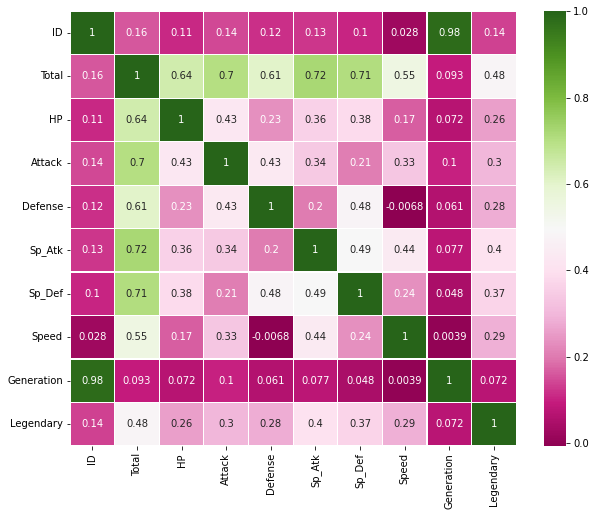

In [51]:
sns.heatmap(df.corr(),annot=True,cmap='PiYG',linewidths=0.2)

# 현재 figure를 확인
fig=plt.gcf()

# 크기 지정
fig.set_size_inches(10,8)
plt.show()

- 포켓몬세대와 ID의 상관관계는 당연한것이므로 무시한다. ID 및 세대순대로 정렬되어있는 데이터이기 때문이다.
- Total 값은 HP, Attack, Defense, Sp. Atk, Sp. Def, Speed값에 따라 정해지기 때문에 상관관계를 무시한다.
- 전설의 포켓몬 여부와 Total의 상관관계가 0.48으로 양의 상관관계가 있다.
- Sp_Atk(특수공격력)과 Sp_Def(특수방어력)의 상관관계가 0.49로 양의 상관관계가 있다.
- 전체적으로 특수공격력과 전설의포켓몬 여부, 특수공격력과 스피드, 방어력과 특수방어력의 상관관계가 0.4이상으로 양의 상관관계가 있는 편이다.

### 2) 타입별 포켓몬

#### (1) Type1


Type1별 포켓몬 개수

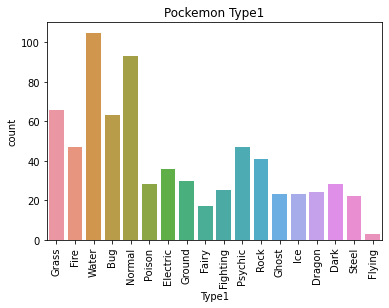

In [55]:
sns.countplot(x=df['Type1'],data=df)
plt.title('Pockemon Type1')
plt.xticks(rotation=90)
plt.show()

- 물타입, 노멀타입, 풀타입 포켓몬 순서대로 많다.

Type1에 따른 포켓몬 능력치 평균

In [57]:
df_Type1 = df.groupby('Type1')[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']].mean()
df_Type1

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
Type1,,,,,,
Bug,55.952381,65.222222,67.698413,54.031746,62.158730,60.063492
Dark,67.178571,86.250000,67.928571,70.500000,67.500000,75.392857
Dragon,78.041667,102.625000,79.125000,82.458333,83.041667,76.666667
Electric,59.500000,67.777778,59.083333,83.083333,67.722222,83.527778
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
Fighting,70.240000,94.720000,64.280000,48.560000,63.680000,62.880000
Fire,68.595745,82.212766,64.893617,83.468085,69.468085,74.382979
Flying,68.000000,71.666667,61.666667,89.000000,66.666667,96.333333
Ghost,61.565217,66.652174,76.826087,80.434783,77.347826,60.826087


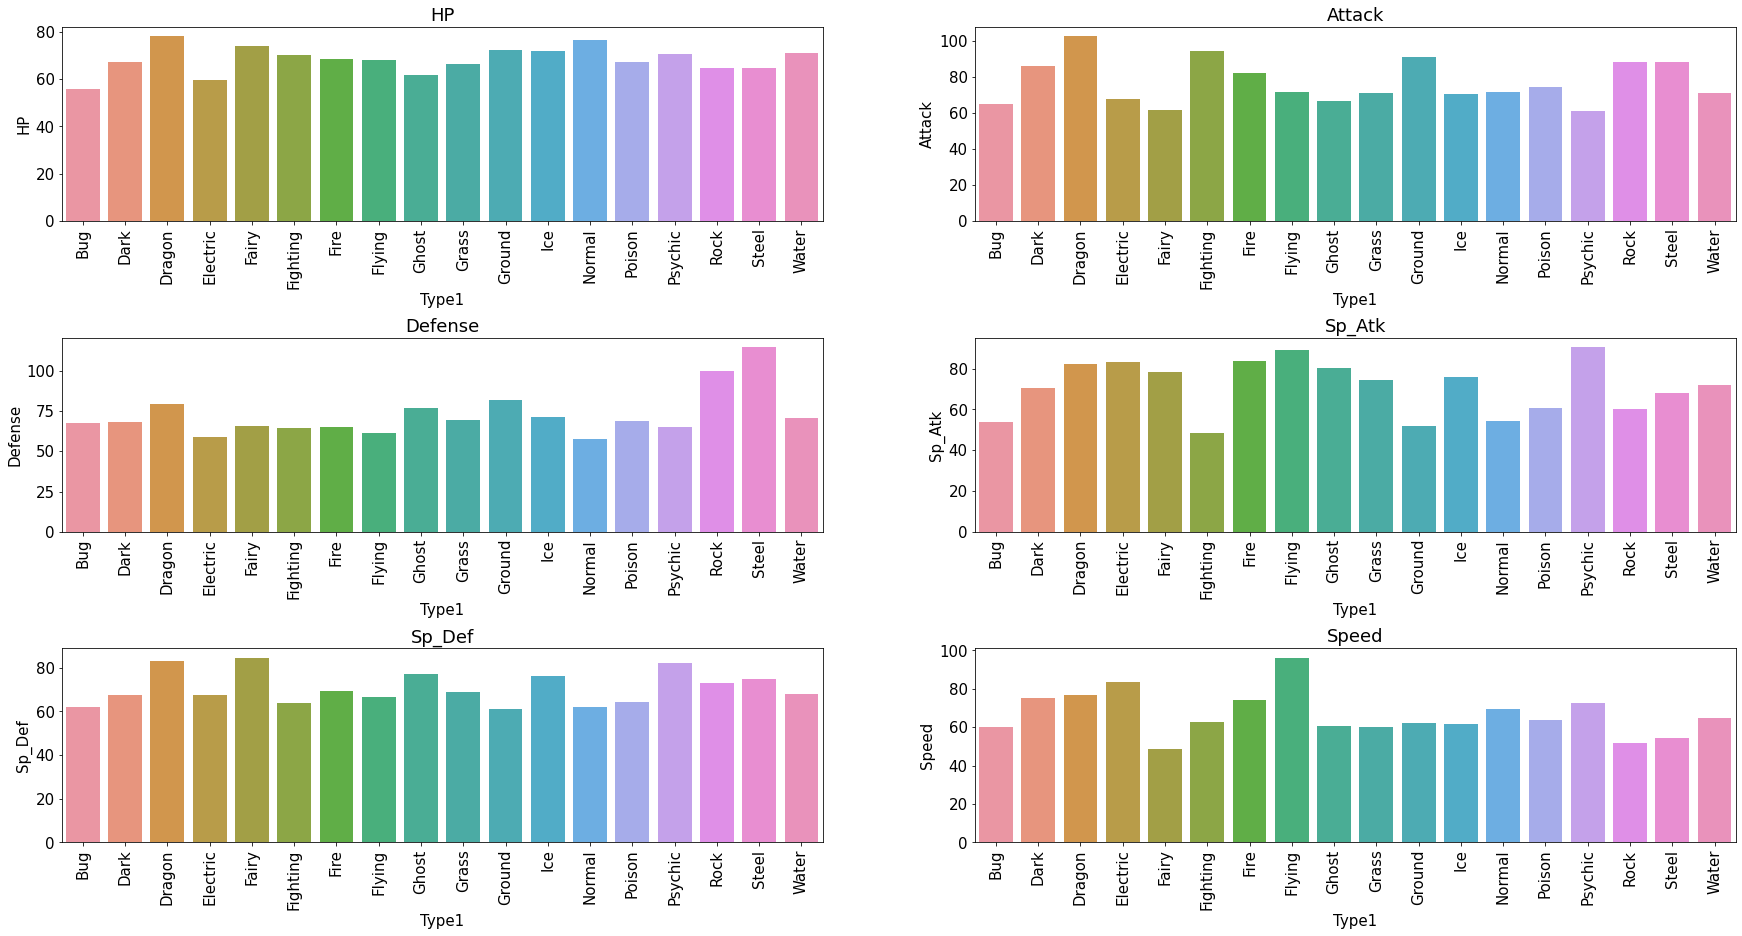

In [81]:
feature_title = ['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']
plt.figure(figsize=(30,15))

for i in range(len(feature_title)):
    plt.subplot(3,2,i+1)
    plt.rcParams['font.size'] = 15
    plt.title(feature_title[i])
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.6)
    sns.barplot(x=df_Type1.index,y=df_Type1[feature_title[i]],data=df_Type1)
plt.show()

Type1별 포켓몬의 능력치별 가장 강한타입, 가장 약한타입
- HP : 드래곤, 벌레
- Attack : 드래곤, 페어리
- Defense : 강철, 노멀
- Sp_Atk : 에스퍼, 페어리
- Sp_Def : 페어리, 땅
- Speed : 비행, 페어리

몇가지 눈에 띄는 것을 간단하게 요약하면
- 페어리타입은 특수공격력, 특수방어력, HP에 강하고 공격력, 스피드에 약한편이다.
- 드래곤타입은 HP, 공격력을 비롯해서 거의 모든 능력치가 강한편이지만 특수방어력, 방어력이 조금 낮은편이다.

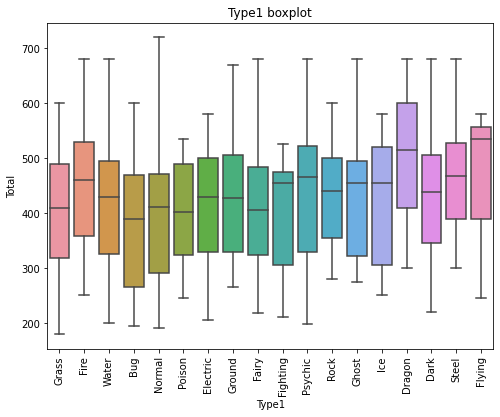

In [98]:
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 10
p = sns.boxplot(x='Type1', y='Total', data=df)
p.set_title('Type1 boxplot')
plt.xticks(rotation=90)
plt.show()

- 얼음타입 포켓몬이 전체 능력치가 높은편이고 노멀타입 포켓몬이 전체능력치가 넓게 분포되어있다.

#### (2) Type2

Type2별 포켓몬 개수

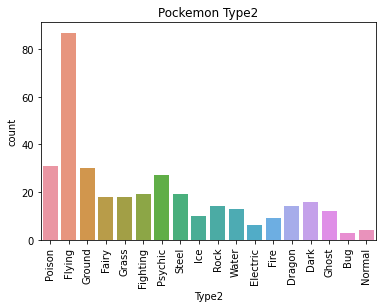

In [94]:
sns.countplot(x=df['Type2'],data=df)
plt.title('Pockemon Type2')
plt.xticks(rotation=90)
plt.show()

- 비행타입 포켓몬이 Type2를 많이 가지고 있다.

In [95]:
df_Type2 = df.groupby('Type2')[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']].mean()
df_Type2

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
Type2,,,,,,
Bug,53.333333,90.000000,80.000000,46.666667,61.666667,61.666667
Dark,72.875000,98.562500,65.750000,74.437500,59.500000,73.125000
Dragon,77.928571,88.928571,84.000000,86.642857,80.142857,76.428571
Electric,88.166667,72.666667,68.333333,81.166667,73.500000,71.500000
Fairy,62.944444,49.833333,64.611111,64.166667,73.000000,56.555556
Fighting,77.684211,99.894737,77.947368,77.052632,77.842105,78.210526
Fire,70.000000,71.111111,67.222222,103.333333,79.444444,73.888889
Flying,70.126437,75.528736,65.413793,70.482759,68.908046,82.747126
Ghost,59.833333,86.916667,73.083333,74.166667,69.000000,56.166667


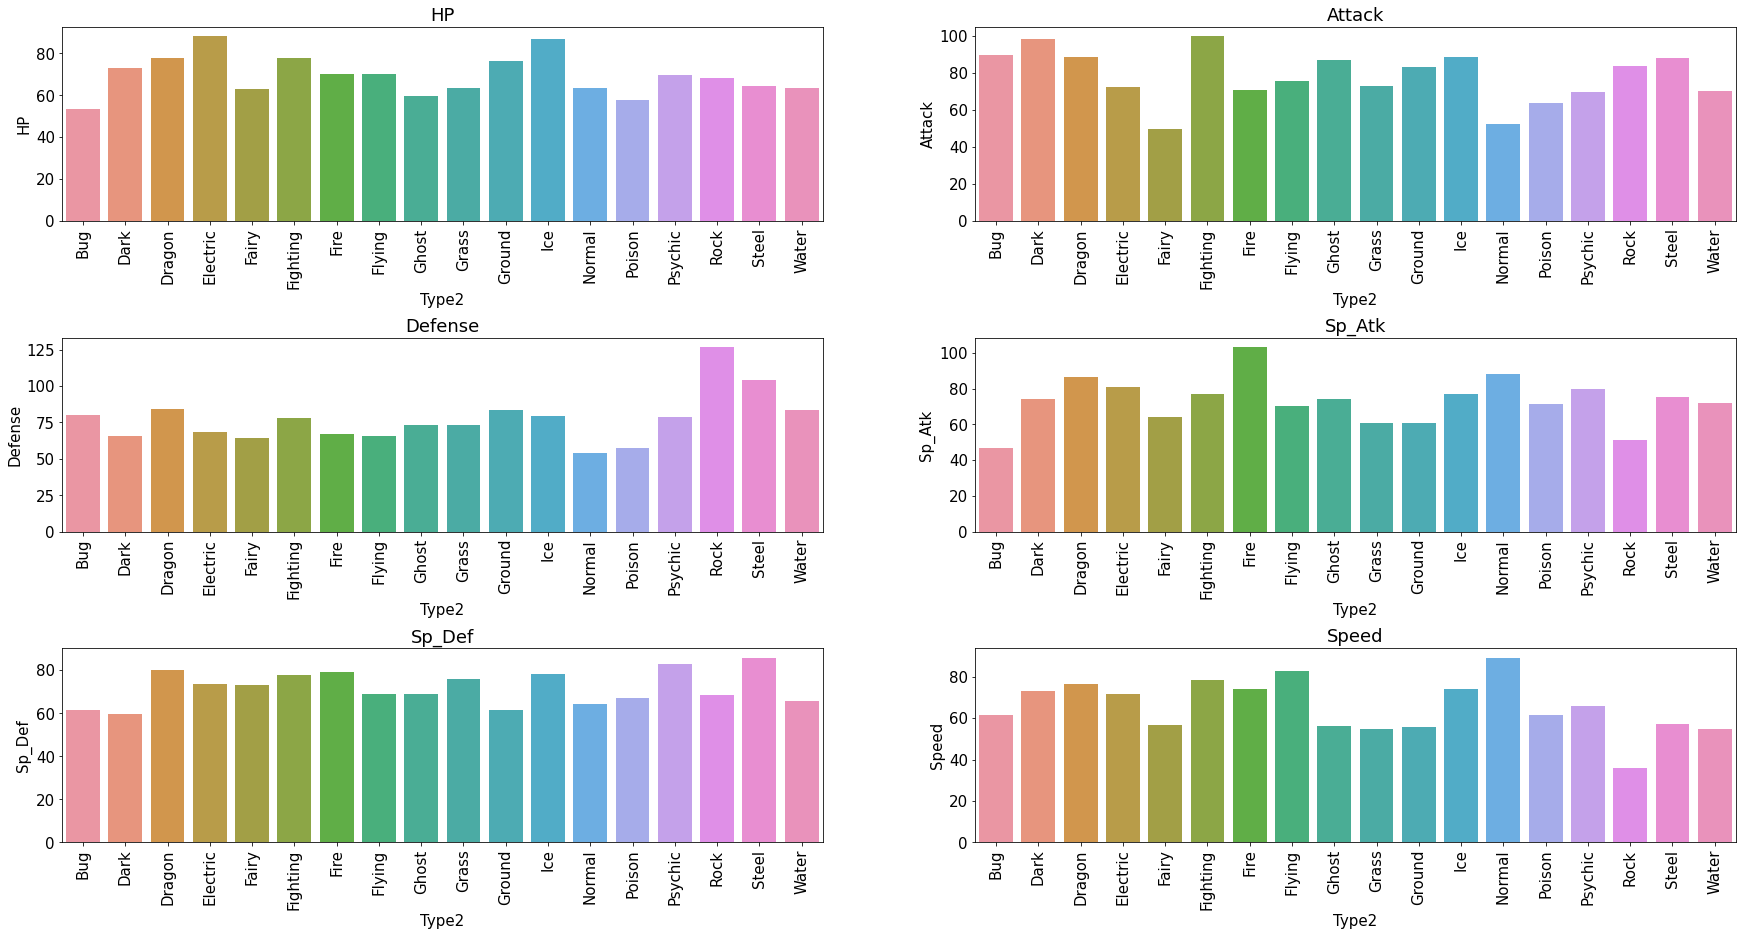

In [97]:
feature_title = ['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']
plt.figure(figsize=(30,15))

for i in range(len(feature_title)):
    plt.subplot(3,2,i+1)
    plt.rcParams['font.size'] = 15
    plt.title(feature_title[i])
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.6)
    sns.barplot(x=df_Type2.index,y=df_Type2[feature_title[i]],data=df_Type2)
plt.show()

Type2별 포켓몬의 능력치별 가장 강한타입, 가장 약한타입
- HP : 전기, 벌레
- Attack : 격투, 페어리
- Defense : 바위, 노멀
- Sp_Atk : 불, 벌레
- Sp_Def : 강철, 악
- Speed : 노멀, 바위

몇가지 눈에 띄는 것을 간단하게 요약하면
- 바위타입은 방어력에 강하고 스피드에 약한편이다.
- 노멀타입은 스피드, 특수공격력에 강한편이지만 공격력, 방어력에 약한편이다.

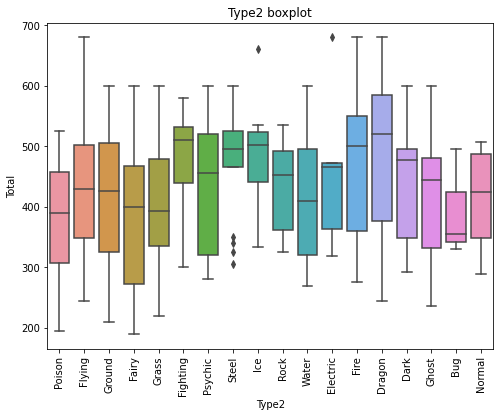

In [91]:
plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 10
p = sns.boxplot(x='Type2', y='Total', data=df)
p.set_title('Type2 boxplot')
plt.xticks(rotation=90)
plt.show()

- Type2의 포켓몬 전체 능력치의 경우 비행, 불, 드래곤 타입의 포켓몬이 능력치 범위가 넓은 편이라는 것을 볼 수 있다.

### 3) 세대에 따른 포켓몬의 능력치

In [108]:
df_generation = df.groupby('Generation')[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total']].mean()
df_generation

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total
Generation,,,,,,,
1,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,407.079470
2,70.580000,68.260000,69.490000,64.300000,72.140000,61.410000,406.180000
3,65.296296,73.111111,68.637037,67.451852,66.244444,61.318519,402.059259
4,73.102804,80.214953,75.205607,73.280374,74.476636,69.476636,445.757009
5,70.185897,80.839744,71.108974,69.243590,67.333333,66.596154,425.307692
6,68.916667,73.888889,73.833333,73.930556,73.333333,65.680556,429.583333


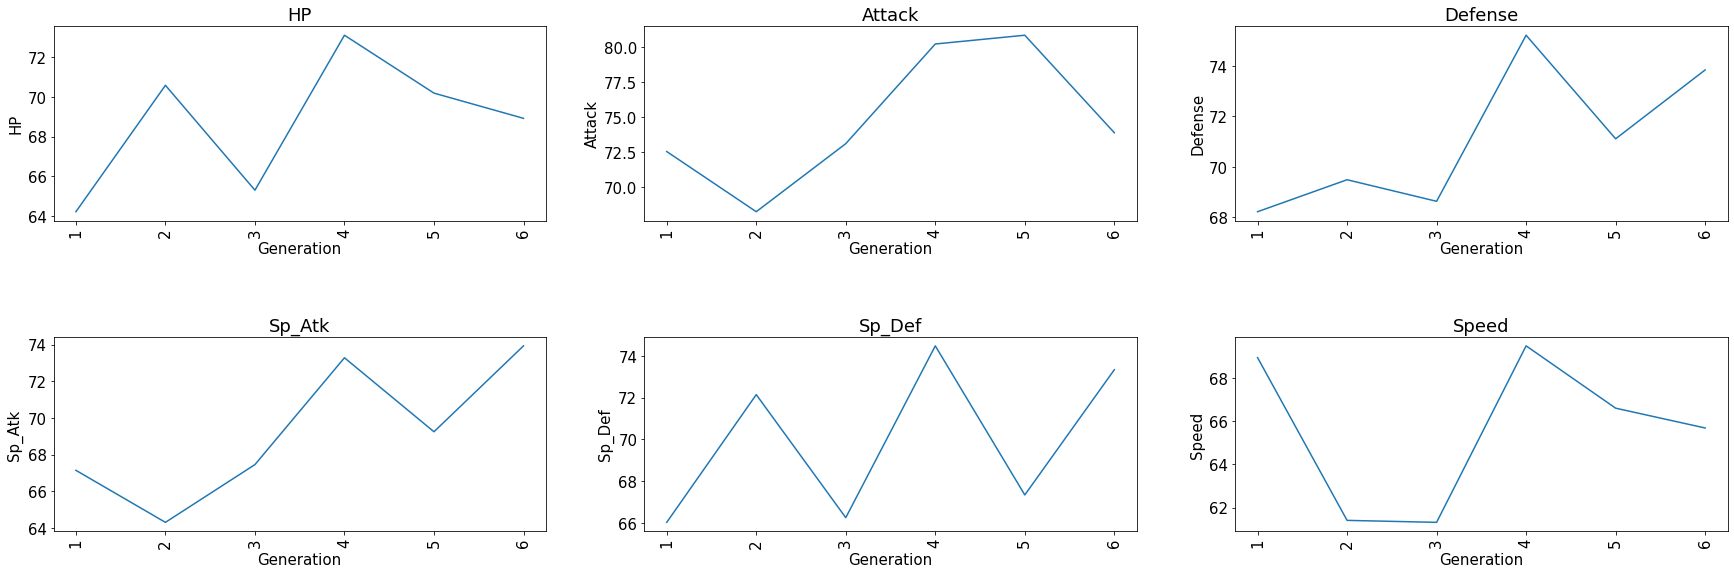

In [106]:
feature_title = ['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed']
plt.figure(figsize=(30,15))

for i in range(len(feature_title)):
    plt.subplot(3,3,i+1)
    plt.rcParams['font.size'] = 15
    plt.title(feature_title[i])
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.6)
    sns.lineplot(x=df_generation.index,y=df_generation[feature_title[i]],data=df_generation)
plt.show()

- lineplot 결과 포켓몬 세대가 거듭할수록 능력치가 강해진다고 볼 수 없다.

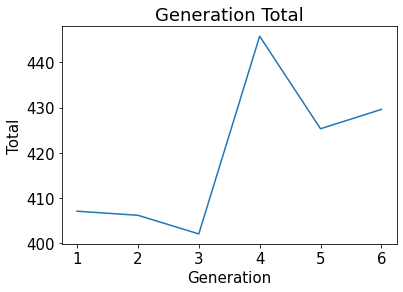

In [122]:
sns.lineplot(x=df_generation.index,y=df_generation['Total'],data=df_generation)
plt.title('Generation Total')
plt.rcParams['font.size'] = 11
plt.show()

- Total을 봐도 세대가 거듭할수록 전체 포켓몬의 능력치가 증가한다고는 볼 수 없다. 4세대 포켓몬이 최강인것은 알 수 있었다.

### 4) 전설의 포켓몬

In [116]:
df_Legendary = df.groupby('Legendary')[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total']].mean()
df_Legendary

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Total
Legendary,,,,,,,
0,66.634074,72.872593,68.562963,65.808889,66.604444,63.678519,404.161481
1,94.000000,108.173913,102.021739,113.456522,106.978261,95.586957,620.217391


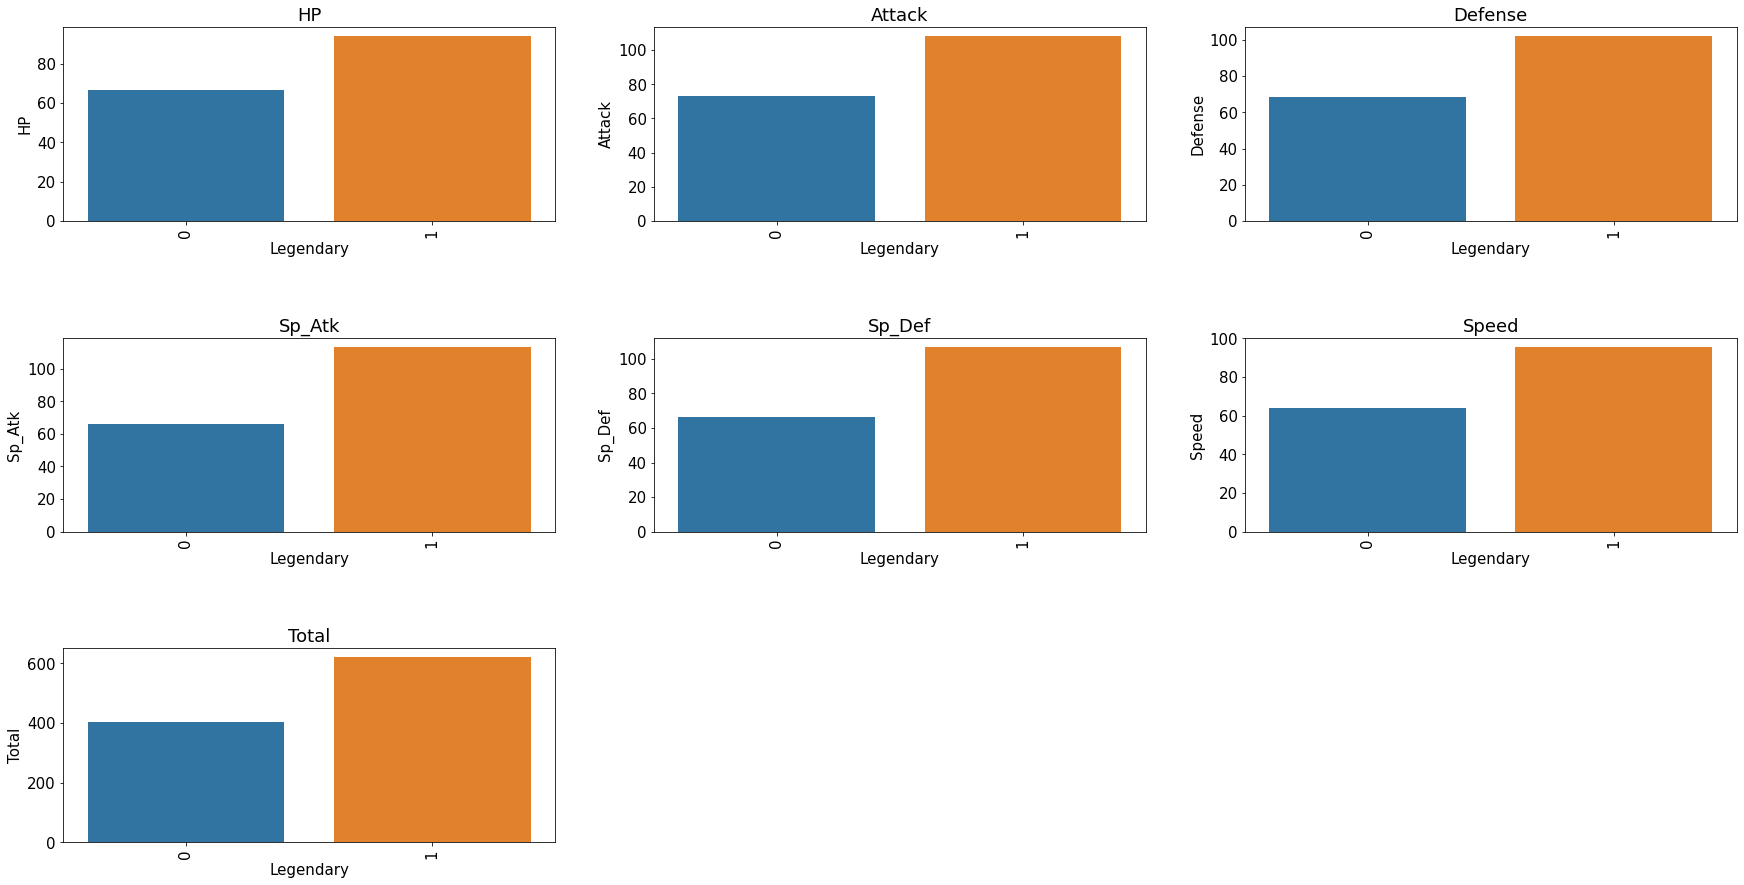

In [121]:
feature_title = ['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Total']
plt.figure(figsize=(30,15))

for i in range(len(feature_title)):
    plt.subplot(3,3,i+1)
    plt.rcParams['font.size'] = 15
    plt.title(feature_title[i])
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.6)
    sns.barplot(x=df_Legendary.index,y=df_Legendary[feature_title[i]],data=df_Legendary)
plt.show()

- 역시 전설의 포켓몬이 모든 능력치가 높다.

## 5. 결론

- 세대에 따라 포켓몬의 능력치가 강화되는게 아니라 포켓몬 타입, 종류에 영향을 받는다.
- 전설의 포켓몬은 비전설의 포켓몬보다 모든 능력치가 뛰어나다
- 개인이 중시하는 포켓몬 타입에 따라 포켓몬 종류선정이 필요하다.